# Básico sobre o NumPy: arrays e processamento vetorizado
> O NumPy, abreviatura de Numerical Python é um dos pacotes básicos mais importantes para processamento numérico em Python. A maioria dos pacotes de processamento com funcionalidades científicas utiliza objetos array do NumPy.

- ndarray - um array multidimensional eficaz que oferece operações aritméticas rápidas, orientadas a array;
- funções matemáticas para operações rápidas em arrays de dados inteiros, sem que seja necessário escrever laços;
- ferramentas para ler/escrever dados de array em disco e trabalhar com arquivos mapeados em memória;
- recursos de álgebra linear, geração de números aleatórios e transformada de Fourier.

> Um dos motivos para o NumPy ser tão importante para o processamentos numéricos em Python é o fat de ele ter sido projetado para ser eficaz em arrays de dados grandes.

- internamento o Numpy armazena dados em um bloco contíguo de memória, independente de outros objetos Python embutidos. A biblioteca do NumPy de algoritmos escritos na linguagem C é capaz de atuar nessa memória sem qualquer verificação de tipo ou outro overhead. Os arrays NumPy também utilizam muito menos memória que as sequêcias embutidas no Python;
- as operações do NumPy realizam processamentos complexos em arrays inteiros sem a necessidade de laços for do Python.



In [1]:
import numpy as np
%time myarr = np.arange(1000000)
%time mylist = list(range(1000000))

CPU times: user 2.39 ms, sys: 4.41 ms, total: 6.81 ms
Wall time: 7.81 ms
CPU times: user 18.8 ms, sys: 20.3 ms, total: 39.1 ms
Wall time: 38.9 ms


In [2]:
%time for _ in range(10): myarr2 = myarr * 2
%time for _ in range(10): mylist2 = [x * 2 for x in mylist]

CPU times: user 19.8 ms, sys: 3.87 ms, total: 23.7 ms
Wall time: 23.6 ms
CPU times: user 616 ms, sys: 116 ms, total: 732 ms
Wall time: 731 ms


In [3]:
arraleatorio = np.random.randn(2,3)
print(arraleatorio)
arraleatorio = arraleatorio * 10
print(arraleatorio)
arraleatorio = arraleatorio + arraleatorio
print(arraleatorio)
#formato e tipo de um ndarray
print(arraleatorio.shape)
print(arraleatorio.dtype)

[[ 1.17656623 -0.16156885  0.1907186 ]
 [ 0.79471215 -1.08151511  0.70482819]]
[[ 11.76566233  -1.61568846   1.90718598]
 [  7.94712151 -10.81515107   7.04828188]]
[[ 23.53132466  -3.23137691   3.81437195]
 [ 15.89424302 -21.63030213  14.09656375]]
(2, 3)
float64


# Criando ndarrays

In [4]:
#criação de um ndarray a partir de uma lista
lista = [6, 7.5, 8, 0, 1]
arr1 = np.array(lista)
print(arr1) 

matriz = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(matriz)
print(arr2)
#inspecionar número de dimensões e formato
print(arr2.ndim)
print(arr2.shape)
print(arr2.dtype)

[6.  7.5 8.  0.  1. ]
[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)
int64


In [5]:
#criando novos arrays com zeros ou uns
arrzeros = np.zeros(10)
print(arrzeros)
arrzeros = np.zeros((3,6))
print(arrzeros)
arrones = np.ones((3,6))
print(arrones)
arrfull = np.full((3,6), 9)
print(arrfull)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[9 9 9 9 9 9]
 [9 9 9 9 9 9]
 [9 9 9 9 9 9]]


In [6]:
arrempty = np.empty((2,3,2))
print(arrempty)
# não é seguro supor que np.empty devolverá um array somente com zeros. Em alguns casos, valores 'lixo' não inicializados poderão ser devolvidos
#eye ou identity - cria uma matriz identidade quadrada N x N (1s na diagonal e 0s nas demais posições)
arreye = np.eye(3)
print(arreye)


[[[6.94504245e-310 4.66941320e-310]
  [1.03977794e-312 9.54898106e-313]
  [1.10343781e-312 1.06099790e-312]]

 [[1.23075756e-312 1.12465777e-312]
  [1.01855798e-312 9.76118064e-313]
  [1.01855798e-312 1.90979621e-312]]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Tipos de dados do NumPy

|Tipo|&nbsp;&nbsp;&nbsp;| Código do tipo |&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|-|-----------|
|int8, uint8| | i1, u1| | Tipos inteiros de 8 bits (1 byte) com e sem sinal|
|int16, uint16| | i2, u2| | Tipos inteiros de 16 bits com e sem sinal|
|int32, uint32| | i4, u4| | Tipos inteiros de 32 bits com e sem sinal|
|int64, uint64| | i8, u8| | Tipos inteiros de 64 bits com e sem sinal|
|float16| | f2 | | Ponto flutuante com metade da precisão|
|float32| | f4 ou f | | Ponto flutuante padrão com precisão única, compatível com o float de C|
|float64| | f8 ou d | | Ponto flutuante padrão com dupla precisão, compatível com o double de C ou o objeto float do Python|
|float128| | f16 ou g | | Ponto flutuante com precisão estendida|
|complex64, complex128, complex256| | c8, c16, c32 | | Números complexos representados por dois floats de 32, 64 ou 128 respectivamente|
|bool| | ? | | Tipo booleano que armazena os valores True e False|
|Object| | O | | Tipo objeto de Python, um valor pode ser qualquer objeto Python|
|string_| | S | | Tipo string ASCII de tamanho fixo (1 byte por caractere) por exemplo para criar um dtype string com tamanho 10, utilize s10|
|unicode_| | U | | Tipo UNICODE de tamanho fixo (número de bytes é específico de cada plataforma) a mesma semântica de especificação de string_ U10|



In [10]:
arr1 = np.array([1,2,3], dtype=np.float64)
print(arr1.dtype)
arr2 = np.array([1,2,3], dtype=np.int32)
print(arr2.dtype)

#conversão de um array de strings em valores numéricos
numeric_strings = np.array(['1.25','-9.6','42'], dtype=np.string_)
numeric_strings = numeric_strings.astype(float)
print(numeric_strings.dtype)

float64
int32
float64


# Aritmética com arrays NumPy
> Os arrays são importantes porque permitem expressar operações em lote nos dados, sem descrever qualquer laço for. Os usuários do NumPy chamam isso de vetorização. Qualquer operação aritmética entre arrays de mesmo tamanho faz a operação ser aplicada em todos os elementos.

In [3]:
arr = np.array([[1., 2., 3.],[4.,5.,6.]])
print(arr)
#multiplicação pelos elementos 
print(arr * arr)
#subtração pelos elementos
print(arr - arr)
#divisão de 1 sobre cada elemento
print(1 / arr)
#elevado a um expoente
print(arr ** 0.5)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


In [4]:
#comparação entre elementos do array
arr2 = np.array([[0., 4., 1.],[7.,2.,12.]])
print(arr > arr2)
print(arr == arr2)

[[ True False  True]
 [False  True False]]
[[False False False]
 [False False False]]


# Indexação básica e fatiamento
> A Indexação de arrays NumPy é um assunto rico, pois há muitos modos com os quais você pode querer selecionar um subconjunto de seus dados ou elementos individuais. Arrays unidimensionais são simples; superficialmente, eles se comportam de modo semelhante as listas do Python.

In [10]:
arr = np.arange(10)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)
#Como podemos ver, se você atribuir um valor escalar a uma fatia (slice), como arr[5:8]=12, o valor será propagado (sofrerá broadcast a partir daí) para toda a seleção. Uma primeira distinção importante em relação às listas embutidas de Python é que as fatias de arrays são visualizadas (views) do array original. Isso significa que os dados não são copiados, e qualquer modificação na visualização se refletirá no array original.
arr2 = arr[5:8]
arr2[1] = 30
print(arr2)
print(arr)

5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
[12 30 12]
[ 0  1  2  3  4 12 30 12  8  9]


In [12]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[2])
#notação similar ao C/C++
print(arr2d[0][2])
#notação alternativa
print(arr2d[0,2])


[7 8 9]
3
3


![Indexação de Matriz](img/indexacao_matriz.png)

In [14]:
#cópia de uma determinada parte
arr2copia = arr2d[2].copy()
arr2copia[:] = 200
print(arr2d)
print(arr2copia)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[200 200 200]


In [18]:
#Indexando com fatias
arr = np.array([0,1,2,3,4,5,6,7,8,9])
print(arr[1:6])
print(arr[:2])
#multiplas fatias
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[:2,1:])

[1 2 3 4 5]
[0 1]
[[2 3]
 [5 6]]


![Fatiamento de Matriz](img/indexacao_matriz_2.png)

In [29]:
#Indexação booleana
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
print(names)
print(data)
print(names == 'Bob')
print(data[names == 'Bob'])
print(data[names == 'Bob', 2:])

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-6.48212517e-01  1.43545913e+00 -2.61761540e+00 -1.17393939e+00]
 [-7.33708986e-01  1.20470995e+00 -1.66062585e-01 -2.07285490e+00]
 [-5.51674583e-01 -2.36071274e+00 -5.49871317e-01 -2.75348968e-01]
 [ 1.33872249e-01  2.16096864e-01  6.14291670e-01 -3.48497093e-01]
 [-1.49019174e-01 -1.85067234e+00  4.52242756e-01 -6.35472360e-02]
 [-2.25564439e-03 -1.53924954e-01  1.10274195e+00 -3.10911617e-03]
 [-2.94441437e-01 -1.00451435e+00 -1.82354619e-01 -1.92763535e+00]]
[ True False False  True False False False]
[[-0.64821252  1.43545913 -2.6176154  -1.17393939]
 [ 0.13387225  0.21609686  0.61429167 -0.34849709]]
[[-2.6176154  -1.17393939]
 [ 0.61429167 -0.34849709]]


In [30]:
#inversão de condição
print(data[~(names == 'Bob')])
#Selecionando dois dos três nomes para combinar várias condições booleanas, utilize operadores aritméticos booleanos como & (and) e | (or):
cond = (names == 'Bob') | (names == 'Will')
print(data[cond])

[[-7.33708986e-01  1.20470995e+00 -1.66062585e-01 -2.07285490e+00]
 [-5.51674583e-01 -2.36071274e+00 -5.49871317e-01 -2.75348968e-01]
 [-1.49019174e-01 -1.85067234e+00  4.52242756e-01 -6.35472360e-02]
 [-2.25564439e-03 -1.53924954e-01  1.10274195e+00 -3.10911617e-03]
 [-2.94441437e-01 -1.00451435e+00 -1.82354619e-01 -1.92763535e+00]]
[[-0.64821252  1.43545913 -2.6176154  -1.17393939]
 [-0.55167458 -2.36071274 -0.54987132 -0.27534897]
 [ 0.13387225  0.21609686  0.61429167 -0.34849709]
 [-0.14901917 -1.85067234  0.45224276 -0.06354724]]


In [31]:
#Alterando valores do array usando indexação booleana
data[data < 0] = 0
print(data)

[[0.         1.43545913 0.         0.        ]
 [0.         1.20470995 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.13387225 0.21609686 0.61429167 0.        ]
 [0.         0.         0.45224276 0.        ]
 [0.         0.         1.10274195 0.        ]
 [0.         0.         0.         0.        ]]


## Indexação sofisticada
> Indexação sofisticada (fancy indexing) é o termo adotado pelo NumPy para descrever a indexação usando arrays de inteiros. Suponha que tivéssemos um array 8 x 4

In [36]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i

print(arr)
#Para selecionar um subconjunto de linhas em uma ordem particular, podemos simplemente passar uma lista ou um ndarray de inteiros especificando a ordem desejada
print(arr[[4,3,0,6]])
print(arr[[-3, -5, -7]])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
[[5. 5. 5. 5.]
 [3. 3. 3. 3.]
 [1. 1. 1. 1.]]


In [40]:
#Passar vários índices de array faz algo um pouco diferente; a instrução seleciona um array unidimensional de elementos correspondentes a cada tupla de índice
arr = np.arange(32).reshape((8,4))
print(arr)
#neste caso os elementos (1,0), (5,3), (7,1) e (2,2) foram selecionados
print(arr[[1,5,7,2],[0,3,1,2]])
#Importante: independente de quantas dimensões o array tiver, o resultado da indexação sofisticada SEMPRE será unidimensional. E sempre COPIA os dados para um novo Array.
arr2 = arr[[1,5,7,2],[0,3,1,2]]
arr2[0] = 100
print(arr2)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]
[100  23  29  10]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


## Transposição de arrays e troca de eixos
> A transposição é uma forma especial de reformatação que de modo semelhtante, devolve uma visualização dos dados subjacentes, sem copiar nada. Os arrays tem o método transpose, além do atributo especial T.

In [43]:
arr = np.arange(15).reshape((3,5))
print(arr)
print(arr.T)
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [48]:
#Produto de Matrizes
a = [[1, 0], 
     [0, 1]]
b = [[4, 1], 
     [2, 2]]
print(np.dot(a, b))
#Produto de matrizes transpostas
arr = np.arange(18).reshape((6,3))
print(arr)
print(np.dot(arr.T, arr))

[[4 1]
 [2 2]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]
[[495 540 585]
 [540 591 642]
 [585 642 699]]


## Funções universais: funções rápidas de arrays para todos os elementos

In [63]:
arr = np.arange(10)
print(arr)
#Raiz quadrada
print(np.sqrt(arr))
#Exponencial
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [69]:
x = np.random.randn(4)
y = np.random.randn(4)
print(x)
print(y)
print(np.maximum(x,y))
print(np.minimum(x,y))

[ 0.50096921  0.40300168 -1.01760097 -0.82689824]
[-0.03509975 -0.60670141  1.05667631 -0.34156791]
[ 0.50096921  0.40300168  1.05667631 -0.34156791]
[-0.03509975 -0.60670141 -1.01760097 -0.82689824]


In [70]:
arr = np.random.randn(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 4.73319419 -2.8876988   2.21308583 -0.18467112 -2.51904294 -0.13821396
  0.95451781]
[ 0.73319419 -0.8876988   0.21308583 -0.18467112 -0.51904294 -0.13821396
  0.95451781]
[ 4. -2.  2. -0. -2. -0.  0.]


|Função|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|abs,fabs| | Calcula o valor absoluto de inteiros, números de ponto flutuante e valores complexos para todos os elementos |
|sqrt| | Calcula a raiz quadrada de cada elemento (equipvamente a arr ** 0.5|
|square| | Calcula o quadrado de cada elemento (equivalente a arr ** 2)|
|exp| | Calcula o exponencial ex de cada elemento|
|log, log10, log2, log1p| | Logaritmo natural (base e), log na base 10, log na base 2, e log (1+x), respectivamente|
|sign| | Calcula o sinal de cada elemento: 1(positivo), 0 (zero) ou -1 (negativo)|
|ceil| | Calcula o teto de cada elemento( isto é, o maior inteiro menor ou igual ao elemento)|
|floor| | Calcula o piso de cada elemento ( isto é, o menor inteiro maior ou igual ao número)|
|rint| | Arredonda os elementos para o inteiro mais próximo, preservando o dtype|
|modf| | Devolve as partes fracionárias e inteiras do array como um array separado|
|isnan| | Deolve um array booleano indicando se cada valor é NaN (not a number)|
|isfinite, isinf| | Devolve um array booleano indicando se cada elemento é finito (não inf, não NaN) ou infinito, respectivamente|
|cos,cosh,sin,sinh,tan,tanh| | Funções trigonométricas regulares e hiperbólicas|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh| | Funções trigonométricas inversas|
|logical_not| | Calcula o valor-verdade de not x para todos os elementos (equivalente a ~arr)|


|Função binárias|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|add| | Soma elementos correspondentes em arrays|
|substract| | Subtrai elementos do segundo array do primeiro|
|multiply| | Multiplica elementos do array|
|divide, floor_divide| | Faz a divisão ou a divisão pelo piso (truncando o resto)|
|power| | Eleva os elementos do primeiro array às potências indicadas no segundo array|
|maximum, fmax| | Máximo para todos os elementos; fmax ignora NaN|
|minimum, fmin| | Mínimo para todos os elementos; fmin ignora NaN|
|mod| | Módulo para todos os elementos (resto da divisão)|
|copysign| | Copia o sinal dos valores do segundo argumento para os valores do primeiro argumento|
|greater, greater_equal,less,less_equal,equal,not_equal| | Faz uma comparação para todos os elementos, produzindo um array booleano (equivalente ao operadores infixos >, >=,<,<=,==,!=)|
|logical_and, logical_or,logical_xor| | Calcula o valor-verdade da operação lógica (equivalente aos operadores infixos &,!,^) para todos os elementos|

## Programação orientada a arrays
> Usar arrays NumPy permite expressar vários tipos de tarefas de processamento de dados na forma de expressões concisas de arrays que poderiam, do contrário, exigir a escrita de laços. Essa prática de substituir laços explícitos por expressões de arrays é comumente chamada de vetorização. Em Geral operações vetorizadas em arrays com frequência serão mais rápidas em uma ou duas (ou mais) ordens de grandeza do que seus equivalentes em Python puro, com o maior impacto sendo em qualquer tipo de processamentos numéricos.

In [18]:
#Como um exemplo, suponha que quiséssemos avaliar a função sqrt(x^2+y^2) para uma grade regular de valores. A função np.meshgrid aceita dois arrays 1D e gera duas matrizes 2D correspondentes a todos os pares (x,y) nos dois arrays.
arr1 = np.arange(4).reshape((2,2))
print(arr1)
xs, ys = np.meshgrid(arr1, arr1)
print(xs)
print(ys)
arrz = np.sqrt(xs ** 2 + ys ** 2)
print(arrz)

[[0 1]
 [2 3]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[0.         1.         2.         3.        ]
 [1.         1.41421356 2.23606798 3.16227766]
 [2.         2.23606798 2.82842712 3.60555128]
 [3.         3.16227766 3.60555128 4.24264069]]


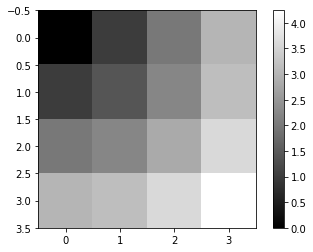

In [19]:
import matplotlib.pyplot as plt
plt.imshow(arrz, cmap=plt.cm.gray)
plt.colorbar()

## Expressando uma lógica condicional como operações de array
> A função numpy.where é uma versão vetorizada da expressão ternária x if condition else y.


In [21]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond, xarr, yarr)
print(result)

[1.1 2.2 1.3 1.4 2.5]


## Métodos matemáticos e estatísticos
> Um conjunto de funções matemáticas que calcula estatísticas sobre um array inteiro ou sobre os dados ao longo de um eixo é acessível por meio de métodos da classe array. Você pode usar agregação (com frequência chamadas de reduções), como sum, mean, e std (desvio-padrão), seja chamando o método da instância do array ou usando a função de nível superior do NumPy.

In [32]:
arr = np.arange(16).reshape(4,4)
print(arr)
print(arr.mean())
print(arr.sum())
print(arr.mean(axis=1)) #axis=1 coluna
print(arr.sum(axis=0)) #axis=0 linha

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
7.5
120
[ 1.5  5.5  9.5 13.5]
[24 28 32 36]


In [35]:
arr = np.array([1,2,3,4,5,6,7])
print(arr.cumsum())
print(arr.cumprod())

[ 1  3  6 10 15 21 28]
[   1    2    6   24  120  720 5040]


|Método|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|sum| | Soma de todos os elementos do array ou ao longo de um eixo; arrays de tamanho zero tem soma igual a zero|
|mean| | Média aritmética, arrays de tamanho zero tem média NaN|
|std,var| | Desvio-padrão e variância, respectivamente, com graus opcionais de ajuste de liberdade (denominador default n)|
|min,max| | Mínimo e máximo|
|argmin, argmax| | Índices dos elementos mínimos e máximois, respectivamente|
|cumsum| | Soma cumulativa dos elementos, começando de 0|
|cumprod| | Produto cumulativo dos elementos, começando de 1|



In [39]:
a = np.array([[1, 2], [3, 4]])
#Variância o quão distante os números estão da média
print(np.var(a))

#O desvio padrão é simplesmente o resultado positivo da raiz quadrada da variância. 
#Na prática, o desvio padrão indica qual é o “erro” se quiséssemos substituir um dos valores coletados pelo valor da média
print(np.std(a))

1.25
1.118033988749895


## Métodos para arrays booleanos
> Valores booleanos sofrem coerção para 1(True) e 0(False) nos métodos anteriores. Assim, sum com frequência é usado como uma forma de contar valores True em um array Booleano

In [41]:
bools = np.array([False, False, True, False])
print((bools == False).sum())

arr = np.random.randn(100)
print((arr > 0).sum())

3
57


In [42]:
#Há dois métodos adicionais any e all, particularmente úteis para arrays booleanos. 
#any testa se um ou m ais valores em um array são True, enquanto all verifica se todos os vlaores são True
print(bools.any())
print(bools.all())

True
False


In [4]:
#Ordenação
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[ 0.1104905  -0.42699742 -1.09616018 -0.27502666  0.35145041 -1.24196517]
[-1.24196517 -1.09616018 -0.42699742 -0.27502666  0.1104905   0.35145041]


In [9]:
#Ordenação por dimensão
arr = np.random.randn(3,3)
print(arr)
arrord = np.sort(arr,0) #ordenação por coluna - retorna copia
print(arrord)
arr.sort(1) #ordenação por linha - altera array original
print(arr)

[[ 0.01682553 -2.22627388 -0.04119609]
 [ 0.17085928  0.6475558   0.60198468]
 [ 0.93561705  0.34816377 -0.31335425]]
[[ 0.01682553 -2.22627388 -0.31335425]
 [ 0.17085928  0.34816377 -0.04119609]
 [ 0.93561705  0.6475558   0.60198468]]
[[-2.22627388 -0.04119609  0.01682553]
 [ 0.17085928  0.60198468  0.6475558 ]
 [-0.31335425  0.34816377  0.93561705]]


## Unicidade e outras lógicas de conjuntos

In [11]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe'])
names= np.unique(names)
print(names)

['Bob' 'Joe' 'Will']


In [12]:
#np.in1d compara a existência de elementos de um array no segundo array
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

|Método|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|unique(x)| |Calcula os elementos únicos ordenados de x|
|intersect1d(x, y)| |Calcula os elementos comuns ordenados em x e y|
|union1d(x, y)| |Calcula a união ordenada dos elementos|
|in1d(x, y)| |Calcula um array booleano indicando se cada elemento de x está contido em y|
|setdiff1d(x, y)| |Diferença entre conjuntos, isto é, elementos em x que não estão em y|
|setxor1d(x, y)| |Diferença simétrica entre conjuntos: elementos que estão em apenas um dos arrays, mas não em ambos| 

# Entrada e saída de arquivos com arrays
> O NumPy é capaz de salvar e carregar dados de e para o disco, seja em formato-texto ou em formato binário.

In [13]:
arr = np.arange(10)
np.save('some_array', arr)

In [14]:
arr2 = np.load('some_array.npy')
print(arr2)

[0 1 2 3 4 5 6 7 8 9]


In [15]:
#Voce pode salvar vários arrays em um arquivo não compactado usando np.savez, passando os arrays como argumentos nomeados
np.savez('array_archive.npz', a=arr, b=arr)

In [17]:
arch = np.load('array_archive.npz')
print(arch['a'])
print(arch['b'])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [18]:
#salvando arrays no formato compactado
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

# Algebra Linear
> A álgebra linear, assim como a multiplicação de matrizes, as decomposições, os determinantes e outras operações matemáticas em matrizes quadradas, é uma parte importante de qualquer biblioteca de arrays.

|Método|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|diag| |Devolve os elementos diagonais (ou fora da diagonal) de uma matriz quadrada como um array 1D, ou converte um array 1D em uma matriz quadrada, com zeros fora da diagonal|
|dot| |Multiplicação de matrizes|
|trace| |Calcula a soma dos elementos da diagonal|
|det| |Calcula o determinante da matriz |
|eig| |Calcula os autovalores (valores próprios) e os autovetores de uma matriz quadrada|
|inv| |Calcula a inversa de uma matriz quadrada 
|pinv| |Calcula a pseudoinversa de Moore-Penrose de uma matriz|
|qr| |Calcula a decomposição QR| 
|svd| | Calcula a SVD (Singular Value Decomposition, ou Decomposição de Valor Singular)|
|solve| |Resolve o sistema linear Ax = b para x, em que A é uma matriz quadrada|
|lstsq| | Calcula a solução de quadrados mínimos para Ax = b|


In [22]:
#Solve the system of equations 
#4x + 3y + 2z = 25
#-2x + 2y + 3z = -10
#3x -5y + 2z = -4
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
B = np.array([25, -10, -4])
X2 = np.linalg.solve(A,B)

print(X2)

[ 5.  3. -2.]


## Geração de números pseudoaleatórios
> O módulo numpy.random suplementa o módulo embutido random de Python com funções para gerar arrays inteiros de valores de amostras, de modo eficaz, a partir de vários tipos de distribuições de probabilidade.

In [24]:
# 4x4 amostras de distribuição normal
sample = np.random.normal(size=(4,4))
print(sample)

[[-0.36723338 -1.72314484  0.93377541  2.16588515]
 [ 0.86716933 -0.46384683  0.40044181 -0.50993717]
 [-0.60089768  0.73472022 -0.87552436  0.3134715 ]
 [ 0.98769828 -1.09186612 -0.79179422 -0.35975878]]


> Chamamos esses números de pseudoaleatórios porque são gerados por um algoritmo com um comportamento determinístico, baseado na semente (seed) do gerador de números aleatórios. Podemos alterar a semente para a geração de números aleatórios no NumPy usando np.random.seed.

In [25]:
np.random.seed(1234)

> As funções de geração de dados em numpy.random utilizam uma semente aleatória global. A fim de evitar um estado global, podemos usar numpy.random.RandomState para criar um gerador de números aleatórios isolado de outros:

In [26]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

|Função|&nbsp;&nbsp;&nbsp;| Descrição |
|----|-|----------------|
|seed| | Fornece uma semente ao gerador de números aleatórios|
|permutation| |Devolve uma permutação aleatória de uma sequência ou um intervalo permutado|
|shuffle| |Permuta aleatoriamente uma sequência in-place rand Sorteia amostras de uma distribuição uniforme|
|randint| | Sorteia inteiros aleatórios de um dado intervalo de valores menores para maiores|
|randn| | Sorteia amostras de uma distribuição normal com média 0 e desvio-padrão 1 (interface do tipo MATLAB)|
|binomial| |Sorteia amostras de uma distribuição binomial|
|normal| | Sorteia amostras de uma distribuição normal (gaussiana)|
|beta| |Sorteia amostras de uma distribuição beta|
|chisquare| | Sorteia amostras de uma distribuição qui-quadrada|
|gamma| | Sorteia amostras de uma distribuição gama|
|uniform| | Sorteia amostras de uma distribuição uniforme \[0, 1\]|
